In [1]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv('health_lifestyle_dataset.csv')

In [5]:
data.head()

,Age,Gender,Hours_of_Exercise_per_Week,Diet_Type,Sleep_Hours_per_Night,Water_Intake_Liters_per_Day,Smoking_Habit,Alcohol_Consumption_per_Week,Stress_Level,Health_Status
0,21,Other,18,High Carb,5.5,2.0,No,1,Medium,Average
1,38,Male,7,Vegan,6.8,2.5,Yes,0,Low,Fit
2,56,Male,19,High Protein,8.0,2.5,No,4,High,Fit
3,32,Other,5,Keto,9.4,1.3,No,9,Medium,Unhealthy
4,21,Other,15,Vegan,4.8,2.1,No,4,Low,Fit


We have the data of different persons with their diet, exercise, and sleep details with their fitness values as they are fit or average or unhealthy like that

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           3500 non-null   int64  
 1   Gender                        3500 non-null   object 
 2   Hours_of_Exercise_per_Week    3500 non-null   int64  
 3   Diet_Type                     3500 non-null   object 
 4   Sleep_Hours_per_Night         3500 non-null   float64
 5   Water_Intake_Liters_per_Day   3500 non-null   float64
 6   Smoking_Habit                 3500 non-null   object 
 7   Alcohol_Consumption_per_Week  3500 non-null   int64  
 8   Stress_Level                  3500 non-null   object 
 9   Health_Status                 3500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 273.6+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3500.0,40.926000,13.670790,18.0,29.0,41.0,53.0,64.0
Hours_of_Exercise_per_Week,3500.0,9.360571,5.784769,0.0,4.0,9.0,14.0,19.0
Sleep_Hours_per_Night,3500.0,6.977429,1.751548,4.0,5.4,6.9,8.5,10.0
Water_Intake_Liters_per_Day,3500.0,2.261600,1.011285,0.5,1.4,2.2,3.1,4.0
Alcohol_Consumption_per_Week,3500.0,4.538571,2.857969,0.0,2.0,5.0,7.0,9.0


Here we can get the basic statistics of our data


In [9]:
data.isnull().sum()

,0
Age,0
Gender,0
Hours_of_Exercise_per_Week,0
Diet_Type,0
Sleep_Hours_per_Night,0
Water_Intake_Liters_per_Day,0
Smoking_Habit,0
Alcohol_Consumption_per_Week,0
Stress_Level,0
Health_Status,0


We do not have any null values in our dataset

In [10]:
data.duplicated().sum()

0

we are not having duplicate records also...

In [11]:
data.columns

Index(['Age', 'Gender', 'Hours_of_Exercise_per_Week', 'Diet_Type',
       'Sleep_Hours_per_Night', 'Water_Intake_Liters_per_Day', 'Smoking_Habit',
       'Alcohol_Consumption_per_Week', 'Stress_Level', 'Health_Status'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

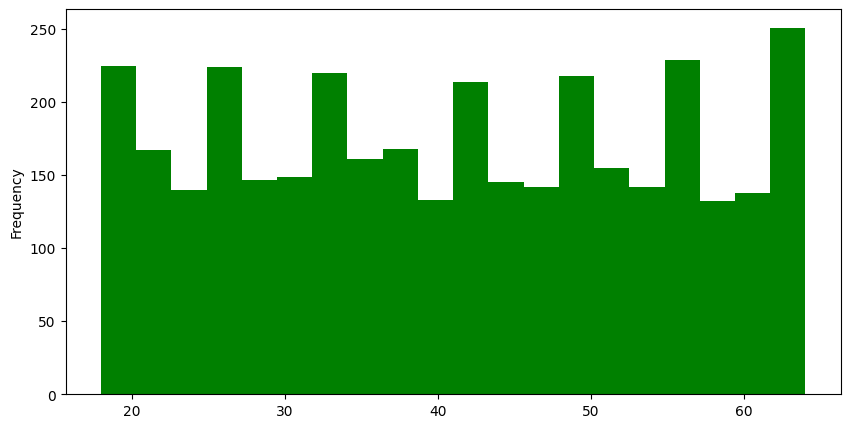

In [15]:
data.Age.plot(kind='hist',figsize=(10,5),bins=20,color='green')

<Axes: xlabel='Gender', ylabel='count'>

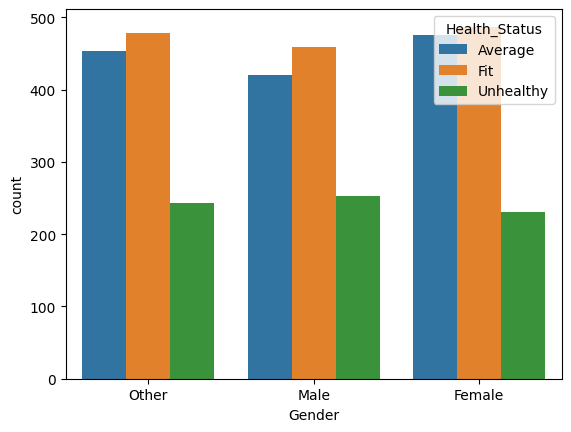

In [17]:
# we will plot which gender are fit
sns.countplot(data=data,x='Gender',hue='Health_Status')

<Axes: xlabel='Hours_of_Exercise_per_Week', ylabel='count'>

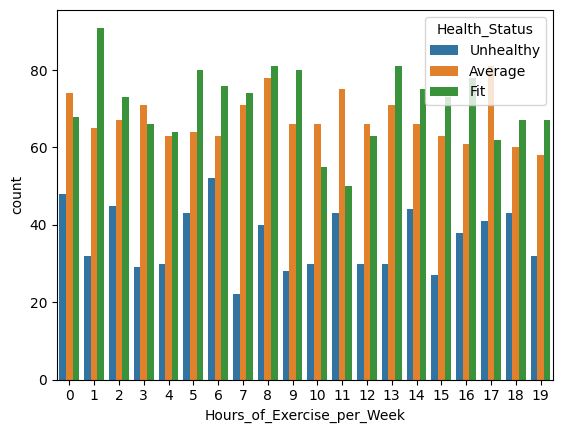

In [18]:
sns.countplot(data=data,x='Hours_of_Exercise_per_Week',hue='Health_Status')

<Axes: xlabel='Diet_Type', ylabel='count'>

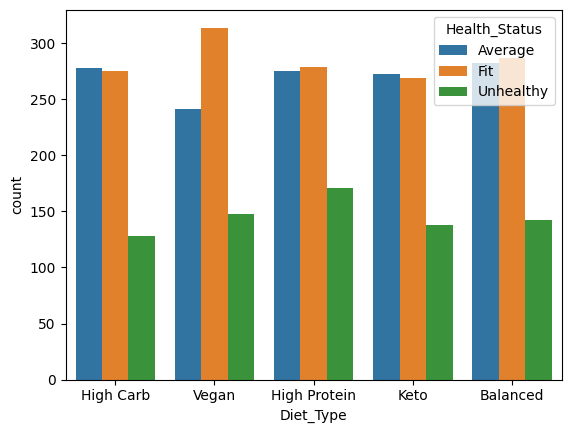

In [21]:
sns.countplot(data=data,x='Diet_Type',hue='Health_Status')

<Axes: xlabel='Stress_Level', ylabel='count'>

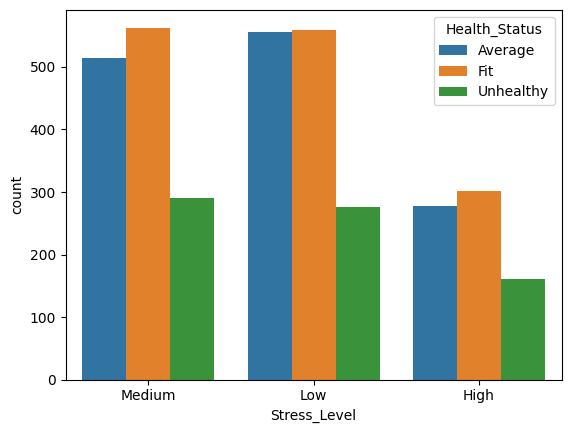

In [34]:
sns.countplot(data=data,x='Stress_Level',hue='Health_Status')

In [35]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [36]:
le=LabelEncoder()

In [37]:
data.columns

Index(['Age', 'Gender', 'Hours_of_Exercise_per_Week', 'Diet_Type',
       'Sleep_Hours_per_Night', 'Water_Intake_Liters_per_Day', 'Smoking_Habit',
       'Alcohol_Consumption_per_Week', 'Stress_Level', 'Health_Status'],
      dtype='object')

In [38]:
data['Gender']=le.fit_transform(data['Gender'])
data['Diet_Type']=le.fit_transform(data['Diet_Type'])
data['Stress_Level']=le.fit_transform(data['Stress_Level'])
data['Smoking_Habit']=le.fit_transform(data['Smoking_Habit'])

In [39]:
# will map Fit=1, average=0 and unlealthy=-1
data['Health_Status']=data['Health_Status'].map({'Fit':1,'Average':0,'Unhealthy':-1})

In [40]:
x=data.drop('Health_Status',axis=1)
y=data['Health_Status']

In [41]:
scalar=StandardScaler()
x=scalar.fit_transform(x)


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
model=KNeighborsClassifier(n_neighbors=5)

In [45]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred=model.predict(x_test)
y_pred

array([-1,  0,  1,  0,  0,  0,  0,  1, -1, -1,  0,  1,  0,  0,  0,  0,  1,
        1,  1, -1,  0,  0,  0, -1, -1,  0,  0, -1,  1,  0, -1,  1, -1, -1,
        0, -1,  1,  0,  0,  0,  0,  1, -1,  0,  1,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  1,  1,  1,  1, -1,  1,  0,  0,  0,  0,  0, -1,  1,
        0,  1,  1,  0,  0, -1, -1,  0,  1, -1,  0,  0,  1, -1,  1,  0,  0,
       -1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1, -1,  1,  1,  0,
        1,  1,  0, -1,  0,  1,  0,  1,  1,  1, -1, -1,  1,  0,  1, -1, -1,
        1,  1,  0,  0,  1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  0,
        1,  1,  0,  1,  0, -1,  0,  1,  1,  0,  0,  1,  0,  0, -1,  1, -1,
        0,  0,  0, -1,  1,  1,  1, -1,  0, -1,  0,  1,  0,  0,  1,  0,  1,
        0,  0,  1,  0,  1,  1,  0,  1,  0, -1, -1,  0, -1,  0,  0,  0, -1,
        0,  0, -1, -1,  0,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,
        0, -1,  1,  1,  1,  1,  1,  0,  0,  0, -1,  0,  1,  1,  0,  1,  1,
        1,  0,  1,  0,  1

In [48]:
accuracy_score(y_test,y_pred)

0.35

In [49]:
confusion_matrix(y_test,y_pred)

array([[ 35,  79,  47],
       [ 50, 123,  97],
       [ 64, 118,  87]])

In [50]:
model2=KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.35